<a href="https://colab.research.google.com/github/josephgeorgeMLDL1/TransferLearning_Xception_Finetuning1_somelayers/blob/main/Fine_Tuning_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.9.2


In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/y_test.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (400, 299, 299, 3)
X_test_std_shape: (100, 299, 299, 3)


In [5]:
model_FineTune = keras.models.load_model('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/01_Xception_TransferLearning_Best_Model.h5')

In [6]:
model_FineTune.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_5[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [7]:
model_FineTune.layers

In [8]:
len(model_FineTune.layers)

134

In [9]:
# Fine-tune the model from index 60 onwards

for layer in model_FineTune.layers[:60]:
  layer.trainable = False

for layer in model_FineTune.layers[60:]:
  layer.trainable = True

In [10]:
model_FineTune.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

callbacks_FineTune = [            
             keras.callbacks.ModelCheckpoint("bestFT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model_FineTune.fit(x = X_train_std, y = y_train, epochs=50,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/50
23/23 [==============================] - 20s 338ms/step - loss: 0.3485 - accuracy: 0.9000 - val_loss: 1.7999 - val_accuracy: 0.8000
Epoch 2/50
23/23 [==============================] - 6s 242ms/step - loss: 0.1545 - accuracy: 0.9528 - val_loss: 9.2450 - val_accuracy: 0.4250
Epoch 3/50
23/23 [==============================] - 6s 242ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 2.0608 - val_accuracy: 0.7500
Epoch 4/50
23/23 [==============================] - 6s 245ms/step - loss: 0.1681 - accuracy: 0.9444 - val_loss: 3.5767 - val_accuracy: 0.6000
Epoch 5/50
23/23 [==============================] - 6s 244ms/step - loss: 0.1386 - accuracy: 0.9694 - val_loss: 2.6290 - val_accuracy: 0.6500
Epoch 6/50
23/23 [==============================] - 6s 246ms/step - loss: 0.1602 - accuracy: 0.9556 - val_loss: 0.6534 - val_accuracy: 0.7750
Epoch 7/50
23/23 [==============================] - 6s 244ms/step - loss: 0.1564 - accuracy: 0.9639 - val_loss: 1.0619 - val_accuracy: 0.7500
Epoch

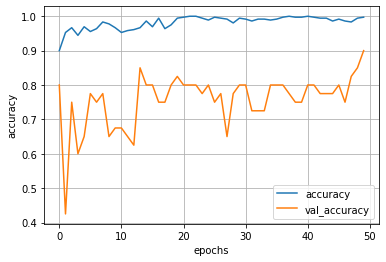

In [11]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [12]:
testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 [==============================] - 2s 272ms/step - loss: 0.4463 - accuracy: 0.8400
Test-loss: 0.446266, Test-accuracy: 0.840000


In [13]:
model_FineTune.load_weights("bestFT.h5")

testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 [==============================] - 1s 165ms/step - loss: 0.4463 - accuracy: 0.8400
Test-loss: 0.446266, Test-accuracy: 0.840000


In [16]:
cProba = model_FineTune.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 1s 662ms/step
[[1.79282818e-02 6.74900599e-03 9.67667818e-01 1.94574276e-03
  5.70920203e-03]
 [1.10477239e-01 4.41305339e-01 2.73722768e-01 8.01667050e-02
  9.43279713e-02]
 [1.41868180e-13 2.44155689e-13 9.99999523e-01 4.89669139e-11
  4.63973947e-07]
 [3.06989282e-01 6.92090154e-01 8.41247616e-04 4.25417675e-05
  3.67960492e-05]
 [1.00000000e+00 5.47863070e-15 5.60520785e-18 3.00291957e-18
  1.03122239e-18]
 [8.10919119e-06 1.05576639e-07 6.23782626e-08 9.99991179e-01
  5.05353341e-07]
 [2.16569492e-06 9.99997258e-01 1.21539037e-08 5.28005273e-07
  1.62158253e-09]
 [1.02734719e-08 4.67992471e-08 9.99949217e-01 1.08136405e-07
  5.06722972e-05]
 [1.32208865e-03 4.27525118e-02 1.25946547e-03 9.54245269e-01
  4.20636206e-04]
 [3.94412427e-06 6.39698119e-05 6.25330269e-01 1.05263192e-04
  3.74496520e-01]]


In [17]:
cLabel = np.argmax(cProba, axis=-1) 

print(cLabel)

[2 1 2 1 0 3 1 2 3 2]


In [19]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]


In [20]:
# Saves the best model obtained
model_FineTune.save('/content/drive/MyDrive/DeepLearning/TransferLearning/Models/02_Xception_FineTuned_Best_Model.h5')